In [16]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [8]:
class AgentState(TypedDict):
    name:str
    numbers : List[int]
    operator : str
    result : str

In [20]:
def get_calculation(state:AgentState)->AgentState:
    """Cal"""
     
    if state['operator'] == "+":
        state['result'] = f"Hey {state['name']} your result is : {sum(state['numbers'])}"
    elif state['operator'] == "-":
        state['result'] = f"Hey {state['name']} your result is : {reduce(lambda x, y: x - y, state['numbers'])}"
    else:
        state['result'] = "Please send the right op. (+,-)"
    return state    

In [21]:
graph = StateGraph(AgentState)
graph.add_node("cal", get_calculation)
graph.set_entry_point("cal")
graph.set_finish_point("cal")

app = graph.compile()

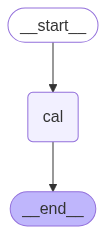

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
app.invoke({"name":"badhon", "operator":"k"})

{'name': 'badhon',
 'operator': 'k',
 'result': 'Please send the right op. (+,-)'}

In [26]:
r = app.invoke({"name":"badhon", "operator":"+", "numbers":[1,2,3,4]})

In [27]:
r['result']

'Hey badhon your result is : 10'